In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.optimize as opt;
from scipy.optimize import curve_fit
import pylab

In [4]:
# Create a reference to the CSV and import it into a Pandas DataFrame
xls = pd.ExcelFile('raw_files/2_16_17jia_af.xlsx')
df1 = pd.read_excel(xls, '0')
df2 = pd.read_excel(xls, '-60')
df3 = pd.read_excel(xls, '60')
df4 = pd.read_excel(xls, '-50')
df5 = pd.read_excel(xls, '50')
df6 = pd.read_excel(xls, '-40')
df7 = pd.read_excel(xls, '40')
df8 = pd.read_excel(xls, 'F')

In [5]:
df1.head()

,[Time,MagPos,RotState,AFZ_current
0,3246.488,1280,0,2.1131
1,3250.544,1280,0,2.3335
2,3254.548,1280,0,2.0945
3,3258.586,1280,0,2.3367
4,3262.606,1280,0,2.2485


In [6]:
df2.head()

,[Time,MagPos,RotState,AFZ_current
0,7366.160,1280,-60,0.2225
1,7370.228,1280,-60,0.0341
2,7374.273,1280,-60,0.0618
3,7378.305,1280,-60,0.2366
4,7382.600,1280,-60,0.1961


In [7]:
df8.head(100)

,MagPos,Force_Fourier,error
0,1800,12.4371,0.3730
1,1750,8.6893,0.2605
2,1700,5.3461,0.1603
3,1650,4.1863,0.1255
4,1600,2.3071,0.0692
5,1550,1.6149,0.0484
6,1500,1.5037,0.0451
7,1450,0.9695,0.0291
8,1400,0.9286,0.0278
9,1350,0.6254,0.0187


In [8]:
x = np.array([1800,1750,1700,1650,1600,1550,1500,1450,1400,1350,1300,1250,1200,1150,1100,1050,1000])
y = np.array([12.4371,8.6893,5.3461,4.1863,2.3071,1.6149,1.5037,0.9695,0.9286,0.6254,0.4706,0.3611,0.2205,0.1558,0.2057,0.1483,0.0849])
np.polyfit(x, np.log(y), 1)
## y ≈ exp(-8.43e+00) * exp(5.93e-03 * x),  y= 0.00022* exp(5.93e-03 * x)
# biased towards small values, fitting (log y) as if it is linear will emphasize small values of y, 
#causing large deviation for large y.)
#This could be alleviated by giving each entry a "weight" proportional to y. 
#polyfit supports weighted-least-squares via the w keyword argument

array([  5.93323381e-03,  -8.43357348e+00])

In [9]:
np.polyfit(x, np.log(y), 1, w=np.sqrt(y))
# better? not really
#y ≈ exp(-9.57e+00) * exp(6.68 * x),  y= 6.98E-05* exp(6.68 * x)
#Excel use the unweighted (biased) formula for the exponential regression / trend lines

array([  6.67793265e-03,  -9.57214735e+00])

In [10]:
def f(y):
    return 6.98E-05 * np.exp(6.68 * x)
pylab.plot(x,y)


In [11]:
#For y = A + B log x
x = np.array([1800,1750,1700,1650,1600,1550,1500,1450,1400,1350,1300,1250,1200,1150,1100,1050,1000])
y = np.array([12.4371,8.6893,5.3461,4.1863,2.3071,1.6149,1.5037,0.9695,0.9286,0.6254,0.4706,0.3611,0.2205,0.1558,0.2057,0.1483,0.0849])
scipy.optimize.curve_fit(lambda t,a,b: a+b*np.log(t),  x,  y)
#y ≈ -100.6 + 14.25 log(x)

(array([-100.6429442 ,   14.25069237]), array([[ 534.52037664,  -73.90116953],
        [ -73.90116953,   10.22360783]]))

In [12]:
#For y = AeBx
x = np.array([1800,1750,1700,1650,1600,1550,1500,1450,1400,1350,1300,1250,1200,1150,1100,1050,1000])
y = np.array([12.4371,8.6893,5.3461,4.1863,2.3071,1.6149,1.5037,0.9695,0.9286,0.6254,0.4706,0.3611,0.2205,0.1558,0.2057,0.1483,0.0849])
#scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  x,  y)
scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  x,  y,  p0=(4, 0.1))

(array([  5.59075251e-14,   9.99999999e-02]),
 array([[  5.94781191e-21,  -7.49995298e-18],
        [ -7.49995298e-18,   9.45714114e-15]]))

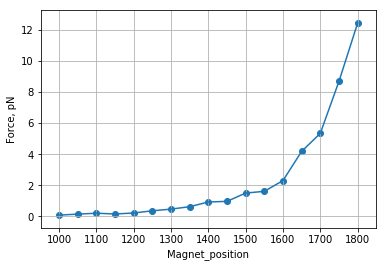

In [13]:
x = df8.MagPos.unique()
y = df8.Force_Fourier.unique()
plt.scatter(x,y)
plt.legend(loc='force_calibration')
plt.ylabel('Force, pN')
plt.xlabel('Magnet_position')
plt.grid()
plt.show()
plt.savefig("Force_calibration.png")

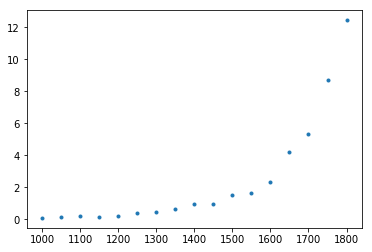

In [14]:
plt.plot(x, y, ".", label="Data");
plt.show()

In [49]:
 popt, pcov = curve_fit(func, x, y)
 plt.plot(x, func(x, *popt), 'r-', label='fit')

C:\Users\Serguei\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [37]:
#group excel file by Magnet Position
df0=df1['AFZ_current'].groupby(df1['MagPos'])
#print descriptive statistics mean, stdev, median, min,max
print(df0.describe())


        count      mean       std     min       25%      50%       75%     max
MagPos                                                                        
1280     13.0  2.244869  0.216220  1.8526  2.113100  2.27880  2.336700  2.6584
1300     11.0  2.345700  0.258975  1.8527  2.260350  2.35010  2.511500  2.6757
1320     10.0  2.405100  0.200024  2.0339  2.274600  2.45250  2.542000  2.6627
1340     10.0  2.386910  0.175506  2.0421  2.270400  2.44250  2.520025  2.6001
1360     10.0  2.180540  0.226929  1.8752  2.048000  2.10450  2.379575  2.5343
1380     10.0  2.226350  0.148101  2.0766  2.143075  2.18265  2.288450  2.5676
1400     10.0  2.203180  0.150206  1.9744  2.097575  2.19705  2.288525  2.4519
1420     10.0  2.283780  0.105898  2.1404  2.233650  2.25250  2.321050  2.4885
1440     11.0  2.363636  0.067939  2.2101  2.350250  2.36170  2.397450  2.4743
1460     10.0  2.378270  0.090528  2.2329  2.343925  2.37050  2.425550  2.5457
1480     22.0  2.319609  0.061990  2.2464  2.270875 